In [1]:
from Bio.SeqUtils import MeltingTemp as mt
from Bio.Seq import Seq


In [64]:
import pandas as pd
import numpy as np

dir1 = "./"

vpanel = dir1+"VatsiPanel.csv"
mpanel = dir1+"MLPanels.csv"
mpanel_mod = dir1+"MLPanel1_mod2.csv"

vp = pd.read_csv(vpanel,header=None)
mp = pd.read_csv(mpanel,header=None)
mpm = pd.read_csv(mpanel_mod,header=None)
vpn = np.array(vp)
mpn = np.array(mp)
mpmn = np.array(mpm)

In [65]:
Tmv = []
Tmm = []
Tmmm = []
for i in range(0,len(vpn)):
    mystringv = vpn[i][0]
    myseqv = Seq(mystringv)
    tmv = mt.Tm_NN(myseqv, nn_table=mt.DNA_NN3)
    Tmv = np.append(Tmv, tmv)

for i in range(0,len(mpn)):    
    mystringm = mpn[i][0]
    myseqm = Seq(mystringm)
    tmm = mt.Tm_NN(myseqm, nn_table=mt.DNA_NN3)
    Tmm = np.append(Tmm, tmm)

for i in range(0,len(mpmn)):    
    mystringmm = mpmn[i][0]
    myseqmm = Seq(mystringmm)
    tmmm = mt.Tm_NN(myseqmm, nn_table=mt.DNA_NN3)
    Tmmm = np.append(Tmmm, tmmm)
    

In [75]:
print(np.median(Tmv))
print(np.median(Tmm))
print(np.median(Tmmm))

print(np.std(Tmv))
print(np.std(Tmm))
print(np.std(Tmmm))

print(Tmmm)
print(mpmn[Tmmm<55])
print(Tmmm[Tmmm<55])

62.43120071178831
62.71344608819314
63.12054290032722
3.444523799968697
3.5617432635058597
3.1517064504158316
[66.82689729 64.71559282 67.00735287 ... 62.83188252 66.18079291
 61.22052633]
[['GAGACATCAGTACTGACAATATGAGGATAG']
 ['GTCTCTCTACAGATCCAGTAGAAATAGATC']]
[54.76133403 54.12477042]


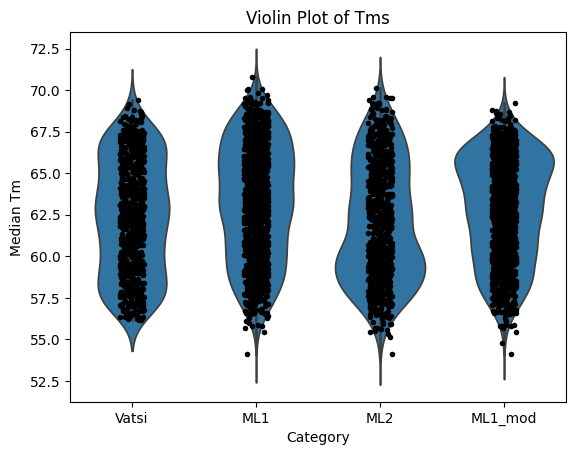

MannwhitneyuResult(statistic=631463.0, pvalue=0.024483127211181663)
MannwhitneyuResult(statistic=329614.5, pvalue=3.498467380646388e-07)
MannwhitneyuResult(statistic=301645.5, pvalue=0.05345976479486275)
700
1098


In [67]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
# Sample data (replace this with your own dataset)
vdata = pd.DataFrame({'Category':['Vatsi']*len(Tmv),'Value':Tmv})
mdata1 = pd.DataFrame({'Category':['ML1']*len(Tmm[0:1098]),'Value':Tmm[0:1098]})
mdata2 = pd.DataFrame({'Category':['ML2']*len(Tmm[1099:len(Tmm)]),'Value':Tmm[1099:len(Tmm)]})
mdata3 = pd.DataFrame({'Category':['ML1_mod']*len(Tmmm),'Value':Tmmm})

combined_data = pd.concat([vdata, mdata1,mdata2,mdata3])


# Create a violin plot
sns.violinplot(x="Category", y="Value", data=combined_data)
sns.stripplot(x="Category", y="Value", data=combined_data, jitter=True, color="black", size=4)


# Add labels and a title
plt.xlabel("Category")
plt.ylabel("Median Tm")
plt.title("Violin Plot of Tms")

# Show the plot
plt.show()

print(stats.mannwhitneyu(Tmv,Tmm,alternative='two-sided'))
print(stats.mannwhitneyu(Tmv,Tmm[0:1098],alternative='two-sided'))
print(stats.mannwhitneyu(Tmv,Tmm[1099:len(Tmm)],alternative='two-sided'))


print(len(Tmv))
print(len(Tmm[0:1098]))

In [43]:
import os
print(os.getcwd())

/Volumes/moor/Vatsi/Github/OligoMinerBlast/Melting Temp Test
